In [25]:
import numpy as np
from numpy import genfromtxt
from numpy import random
import matplotlib.gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy as sp
from scipy.integrate import quad, dblquad, tplquad, simpson
from scipy import interpolate
from parton import mkPDF
import vegas
import pandas as pd
from functools import partial 

## My imports
import WIC_Pheno_Formulae as WIC
from WIC_Pheno_Formulae import *
import PlottingModules as PM
import VegasMC_Generation as VMC
from VegasMC_Generation import *
import ConvertToLHE

## Spectral Densities  (w/ correct normalization!)

/var/folders/3b/1lt3qrpn635524qxcctqlg040000gn/T/ipykernel_44513/2401190002.py:30: RuntimeWarning: invalid value encountered in true_divide
  ax.scatter(μs, μϼ100R30(μs)/μs, s=2)


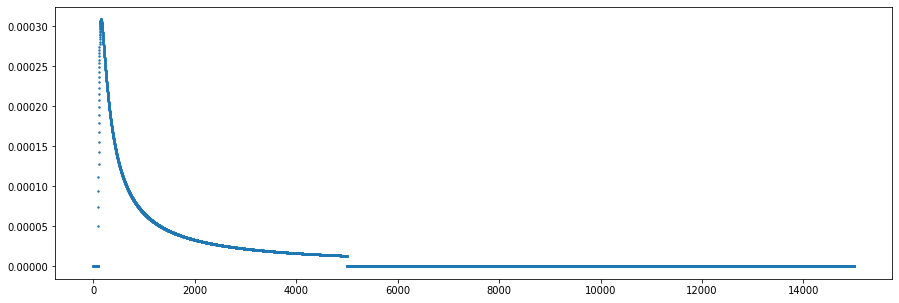

In [26]:
μs = np.linspace(0,15000,15001)

mySD100R30ex = genfromtxt('mySD100R30ex.csv', delimiter=',')
mySD100R50ex = genfromtxt('mySD100R50ex.csv', delimiter=',')
mySD100R80ex = genfromtxt('mySD100R80ex.csv', delimiter=',')
mySD100R200ex = genfromtxt('mySD100R200ex.csv', delimiter=',')
mySD100R1000ex = genfromtxt('mySD100R1000ex.csv', delimiter=',')

μmySD100R30ex = mySD100R30ex*μs; 
μmySD100R50ex = mySD100R50ex*μs; 
μmySD100R80ex = mySD100R80ex*μs; 
μmySD100R200ex = mySD100R200ex*μs; 
μmySD100R1000ex = mySD100R1000ex*μs
μϼ100R30 = interpolate.interp1d(μs, μmySD100R30ex)
μϼ100R50 = interpolate.interp1d(μs, μmySD100R50ex)
μϼ100R80 = interpolate.interp1d(μs, μmySD100R80ex)
μϼ100R200 = interpolate.interp1d(μs, μmySD100R200ex)
μϼ100R1000 = interpolate.interp1d(μs, μmySD100R1000ex)
# Norm_100R30_quad = quad(μϼ100R30, 0,15000)[0]
# Norm_100R50_quad = quad(μϼ100R50, 0,15000)[0]
# Norm_100R80_quad = quad(μϼ100R80, 0,15000)[0]
# Norm_100R200_quad = quad(μϼ100R200, 0,15000)[0]
# Norm_100R1000_quad = quad(μϼ100R1000, 0,15000)[0]

# print(Norm_100R30_quad/np.pi, Norm_100R50_quad/np.pi, 
#       Norm_100R80_quad/np.pi, Norm_100R200_quad/np.pi, Norm_100R1000_quad/np.pi)

fig, ax = plt.subplots(1, 1, figsize = (15,5));
μs = np.linspace(0,15000,15001)
ax.scatter(μs, μϼ100R30(μs)/μs, s=2)

# Cross Section σ

In [27]:
## Training & Unweighting for Production Cross Section
dσ_dμdμp_sqrtS_500_dict = VMC.run_MC_dσ_dμdμp(NPoints=500000, sqrtS=500, μ0=100, μϼ=μϼ100R30)

Running dσ/dμdμp MC for √s = 500 ... 
(484304,) (484304,)
0 of 62500
5000 of 62500
10000 of 62500
15000 of 62500
20000 of 62500
25000 of 62500
30000 of 62500
35000 of 62500
40000 of 62500
45000 of 62500
50000 of 62500
55000 of 62500
60000 of 62500
Returning μ1, μ1p Events, Integral


511.0828804941355


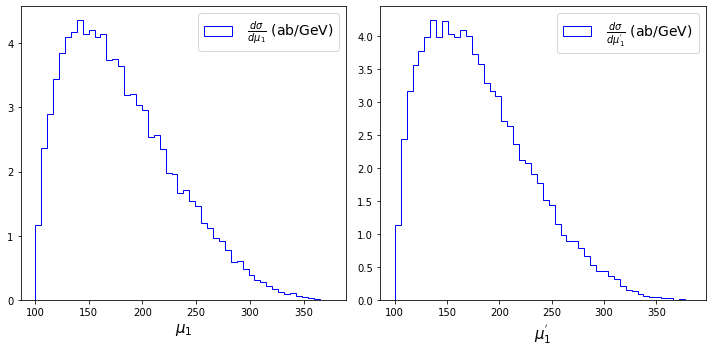

In [28]:
## Plotting Production Cross Section
print(dσ_dμdμp_sqrtS_500_dict['Integral'])
PM.Plot_σ_ee([dσ_dμdμp_sqrtS_500_dict], 
             μ0=100, sqrtS=500, μϼ=μϼ100R30, nbins=50, scale='linear', 
             SCIPY=False, LEGEND=True, TITLE=False, SIZE=(10,5))
plt.tight_layout()
plt.savefig('VegasProjections_WIC_eeProduction.png')

# Rate Γ

### 2-body

In [29]:
## Running MC for dΓ2/dμ2 for different μ1 ## 
dΓ2_dμ2_μ1_195_dict = VMC.run_MC_dΓ2_dμ2(10000, 195, 100, μϼ100R30)
dΓ2_dμ2_μ1_200_dict = VMC.run_MC_dΓ2_dμ2(10000, 200, 100, μϼ100R30)
dΓ2_dμ2_μ1_250_dict = VMC.run_MC_dΓ2_dμ2(10000, 250, 100, μϼ100R30)
dΓ2_dμ2_μ1_300_dict = VMC.run_MC_dΓ2_dμ2(10000, 300, 100, μϼ100R30)
dΓ2_dμ2_μ1_350_dict = VMC.run_MC_dΓ2_dμ2(10000, 350, 100, μϼ100R30)

Running dΓ2/dμ2 MC for μ1 = 195 ... 
4.0685388064014924e-07
0 of 1000
Returning μ2 Events, Integral
Running dΓ2/dμ2 MC for μ1 = 200 ... 
6.005995839901266e-06
0 of 1000
Returning μ2 Events, Integral
Running dΓ2/dμ2 MC for μ1 = 250 ... 
0.0027160089609889393
0 of 1000
Returning μ2 Events, Integral
Running dΓ2/dμ2 MC for μ1 = 300 ... 
0.02020263092992698
0 of 1000
Returning μ2 Events, Integral
Running dΓ2/dμ2 MC for μ1 = 350 ... 
0.07046274010905752
0 of 1000
Returning μ2 Events, Integral


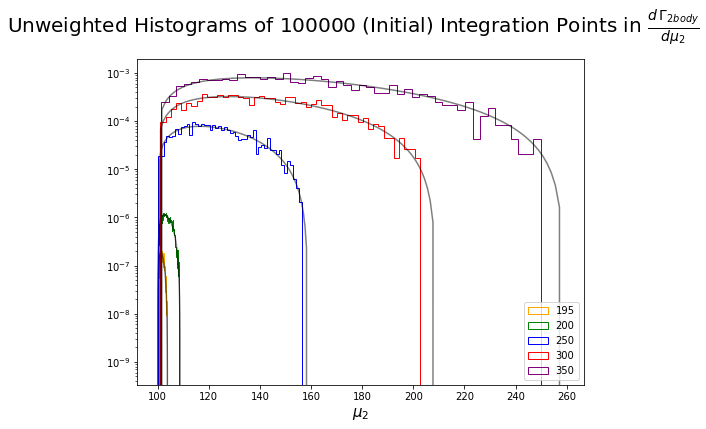

In [30]:
PM.Plot_2body([dΓ2_dμ2_μ1_195_dict,
            dΓ2_dμ2_μ1_200_dict,
            dΓ2_dμ2_μ1_250_dict,
            dΓ2_dμ2_μ1_300_dict,
            dΓ2_dμ2_μ1_350_dict], [195,200,250,300,350], 100, 500, μϼ100R30, 50, 'log')

### 3-body

In [31]:
## Running MC for dΓ3/dμ2dx3dx4 for different μ1 ## 
NPoints = 100000
d3Γ3_dμ2dx3dx4_μ1_102_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 102, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_105_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 105, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_110_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 110, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_120_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 120, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_130_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 130, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_140_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 140, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_150_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 150, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_160_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 160, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_170_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 170, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_180_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 180, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_190_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 190, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_195_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 195, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_200_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 200, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_210_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 210, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_220_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 220, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_230_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 230, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_240_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 240, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_250_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 250, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_260_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 260, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_270_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 270, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_280_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 280, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_290_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 290, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_300_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 300, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_310_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 310, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_320_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 320, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_330_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 330, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_340_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 340, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_350_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 350, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_360_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 360, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_370_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 370, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_380_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 380, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_390_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 390, 100, μϼ100R30)

Running dΓ3/dμ2 MC for μ1 = 102 ... 
4.61845556295937e-17
(99202,) (99202,) (99202,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 105 ... 
2.6211621795081172e-14
(99163,) (99163,) (99163,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 110 ... 
2.7732394125440975e-12
(99087,) (99087,) (99087,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 120 ... 
2.5704990884440435e-10
(99058,) (99058,) (99058,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 130 ... 
3.6845014672244124e-09
(99017,) (99017,) (99017,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 140 ... 
2.3367257357228776e-08
(98954,) (98954,) (98954,)
0 of 12167
5000 of 1

# Finding Threshold

In [32]:
d3Γ3_dμ2dx3dx4_μ1_101_dict  = VMC.run_MC_dΓ3_dμ2(NPoints, 101, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_1015_dict = VMC.run_MC_dΓ3_dμ2(NPoints, 101.5, 100, μϼ100R30)
d3Γ3_dμ2dx3dx4_μ1_102_dict  = VMC.run_MC_dΓ3_dμ2(NPoints, 102, 100, μϼ100R30)

Running dΓ3/dμ2 MC for μ1 = 101 ... 
3.8268113208662896e-19
(99251,) (99251,) (99251,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 101.5 ... 
6.28030763437844e-18
(99229,) (99229,) (99229,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral
Running dΓ3/dμ2 MC for μ1 = 102 ... 
4.588276594990857e-17
(99213,) (99213,) (99213,)
0 of 12167
5000 of 12167
10000 of 12167
Returning μ2 Events, x3 Events, x4 Events, Integral


In [35]:
## Print decay lengths for μ1 = 101, μ1 = 101.5, μ1 = 102 ## 
Γ3_101  = d3Γ3_dμ2dx3dx4_μ1_101_dict['Integral']
Γ3_1015 = d3Γ3_dμ2dx3dx4_μ1_1015_dict['Integral']
Γ3_102 = d3Γ3_dμ2dx3dx4_μ1_102_dict['Integral']
c = 3 * 10**8                    ## m/s
hbar = 6.58*10**(-16)*10**(-9)   ## GeV*s
d_101 = hbar*c/Γ3_101
d_1015 = hbar*c/Γ3_1015
d_102 = hbar*c/Γ3_102
print(d_101, d_1015, d_102)
print('d(μ1 = 101)   = ' + str(d_101))
print('d(μ1 = 101.5) = ' + str(d_1015))
print('d(μ1 = 102)   = ' + str(d_102))

515.8341591696604 31.431581300162954 4.302268965552487
d(μ1 = 101)   = 515.8341591696604
d(μ1 = 101.5) = 31.431581300162954
d(μ1 = 102)   = 4.302268965552487


# Comparison of 2- and 3-body Rates

In [36]:
## Rates ## 
print('Γ3(200) = ' + str(d3Γ3_dμ2dx3dx4_μ1_200_dict['Integral']))
print('Γ3(250) = ' + str(d3Γ3_dμ2dx3dx4_μ1_250_dict['Integral']))
print('Γ2(300) = ' + str(dΓ2_dμ2_μ1_300_dict['Integral']))
print('Γ3(300) = ' + str(d3Γ3_dμ2dx3dx4_μ1_300_dict['Integral']))
print('Γ2(350) = ' + str(dΓ2_dμ2_μ1_350_dict['Integral']))
print('Γ3(350) = ' + str(d3Γ3_dμ2dx3dx4_μ1_350_dict['Integral']))

Γ3(200) = 2.037804456442302e-05
Γ3(250) = 0.002719017553779049
Γ2(300) = 0.02020263092992698
Γ3(300) = 0.019735281676432157
Γ2(350) = 0.07046274010905752
Γ3(350) = 0.06940303164479389


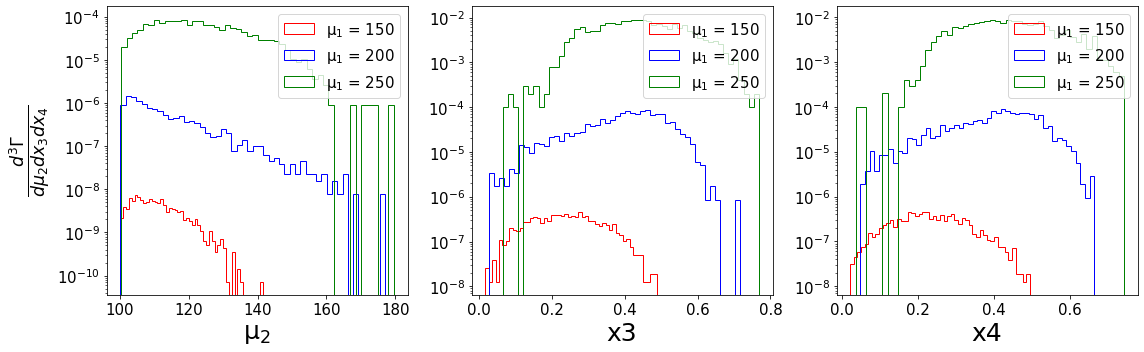

In [37]:
PM.Plot_3body([
#     d3Γ3_dμ2dx3dx4_μ1_102_dict, d3Γ3_dμ2dx3dx4_μ1_105_dict, d3Γ3_dμ2dx3dx4_μ1_110_dict,
#                d3Γ3_dμ2dx3dx4_μ1_120_dict, d3Γ3_dμ2dx3dx4_μ1_130_dict,
#                d3Γ3_dμ2dx3dx4_μ1_140_dict, 
                d3Γ3_dμ2dx3dx4_μ1_150_dict,
#                d3Γ3_dμ2dx3dx4_μ1_160_dict, d3Γ3_dμ2dx3dx4_μ1_170_dict,
#                d3Γ3_dμ2dx3dx4_μ1_180_dict, d3Γ3_dμ2dx3dx4_μ1_190_dict,
#                d3Γ3_dμ2dx3dx4_μ1_195_dict, 
                d3Γ3_dμ2dx3dx4_μ1_200_dict,
#                d3Γ3_dμ2dx3dx4_μ1_210_dict, d3Γ3_dμ2dx3dx4_μ1_220_dict,
#                d3Γ3_dμ2dx3dx4_μ1_230_dict, d3Γ3_dμ2dx3dx4_μ1_240_dict,
               d3Γ3_dμ2dx3dx4_μ1_250_dict, 
#                `d3Γ3_dμ2dx3dx4_μ1_260_dict,
#                d3Γ3_dμ2dx3dx4_μ1_270_dict, d3Γ3_dμ2dx3dx4_μ1_280_dict,
#                d3Γ3_dμ2dx3dx4_μ1_290_dict, d3Γ3_dμ2dx3dx4_μ1_300_dict,
#                d3Γ3_dμ2dx3dx4_μ1_310_dict, d3Γ3_dμ2dx3dx4_μ1_320_dict,
#                d3Γ3_dμ2dx3dx4_μ1_330_dict, d3Γ3_dμ2dx3dx4_μ1_340_dict,
#                d3Γ3_dμ2dx3dx4_μ1_350_dict, d3Γ3_dμ2dx3dx4_μ1_360_dict,
#                d3Γ3_dμ2dx3dx4_μ1_370_dict, d3Γ3_dμ2dx3dx4_μ1_380_dict,
#                d3Γ3_dμ2dx3dx4_μ1_390_dict
            ],  figsize = (16,5), nbins=50, 
                TITLE   = False,
                COLORS  = ['red','blue','green'],
                LEGEND  = ['μ$_{1}$ = 150', 'μ$_{1}$ = 200', 'μ$_{1}$ = 250'], 
                ylabel  = r'$\frac{d^{3}Γ}{dμ_{2}dx_{3}dx_{4}}$',
                xlabel1 = 'μ$_{2}$', xlabel2 = 'x3', xlabel3 = 'x4', 
                labelsize = 25, ticksize = 15, legendsize = 15, scale='log'
                )
plt.tight_layout()
plt.savefig('VegasProjections_WIC_Decay.png')

# Sampling, Rescaling, & Kinematics

In [38]:
def sample(μ1, μ1_actual, body, prime, n, temp_event, threshold):
    ## Sample μ2, x3, x4 ##
    μ2x3x4_Γ3_hist = eval('d3Γ3_dμ2dx3dx4_μ1_' + str(μ1) + '_dict')['All Events']
    random_int = random.randint(0,len(μ2x3x4_Γ3_hist))
    μ2 = μ2x3x4_Γ3_hist[random_int][0]
    x3 = μ2x3x4_Γ3_hist[random_int][1]
    x4 = μ2x3x4_Γ3_hist[random_int][2]
    ## Compute 4-Vectors ##
    FinalState3body_FVs(μ1, μ1_actual, μ2, x3, x4, prime, n, temp_event, threshold)

In [39]:
#######################################################
##################  Production & Decay   ##############
##################     conversion to     ##############
##################       4-vectors       ##############
##################   ( in LHE format )   ##############
#######################################################
MC_Events_LHE = []

s = 500**2
threshold = 102
μ1_histo  = dσ_dμdμp_sqrtS_500_dict['μ1 Events']
μ1p_histo = dσ_dμdμp_sqrtS_500_dict['μ1p Events']

for i in range(len(μ1_histo)):
    temp_event = []
    ## Random Angles
    φ0 = np.random.uniform(low=0.0, high=2*np.pi)
    θ0 = np.random.uniform(low=0.0, high=  np.pi)
#------------------------------------------------------------------------------------#
#                                       Production                                   #
#------------------------------------------------------------------------------------#
######################################### μ1 #########################################
    μ1_sample  = μ1_histo[i]
    μ1p_sample = μ1p_histo[i]
    E1 = (s + μ1_sample**2 - μ1p_sample**2)/(2*np.sqrt(s))
    if μ1_sample > threshold: decay = 1
    if μ1_sample < threshold: decay = 0
    temp_event.append(['PID1', 1000000, μ1_sample, E1,
                       np.sqrt(E1**2 - μ1_sample**2)*np.sin(θ0)*np.cos(φ0),
                       np.sqrt(E1**2 - μ1_sample**2)*np.sin(θ0)*np.sin(φ0),
                       np.sqrt(E1**2 - μ1_sample**2)*np.cos(θ0), decay])
#------------------------------------------------------------------------------------#
#                                         Decay                                      #
#------------------------------------------------------------------------------------#
#################################### μ2, f2a, f2b ####################################
    n = 0
    while True:
        n = n + 1
        ## get the mass 
        if n == 1:                 ### mass of 1st step 
            mass = μ1_sample  
        if n != 1:                 ### mass of nth step
            particle_number = 1 + (3*n - 6) 
            mass = float(np.array(temp_event)[particle_number,2])
        if mass < threshold: 
            break
        else:  
            if    102  < mass < 105:   sample(102, mass, 3, False, n, temp_event, threshold)
            elif  105  < mass < 110:   sample(105, mass, 3, False, n, temp_event, threshold) 
            elif  110  < mass < 120:   sample(110, mass, 3, False, n, temp_event, threshold)
            elif  120  < mass < 130:   sample(120, mass, 3, False, n, temp_event, threshold)
            elif  130  < mass < 140:   sample(130, mass, 3, False, n, temp_event, threshold)
            elif  140  < mass < 150:   sample(140, mass, 3, False, n, temp_event, threshold)
            elif  150  < mass < 160:   sample(150, mass, 3, False, n, temp_event, threshold)
            elif  160  < mass < 170:   sample(160, mass, 3, False, n, temp_event, threshold)
            elif  170  < mass < 180:   sample(170, mass, 3, False, n, temp_event, threshold)
            elif  180  < mass < 190:   sample(180, mass, 3, False, n, temp_event, threshold)
            elif  190  < mass < 195:   sample(190, mass, 3, False, n, temp_event, threshold)
            elif  195  < mass < 200:   sample(195, mass, 3, False, n, temp_event, threshold)
            elif  200  < mass < 210:   sample(200, mass, 3, False, n, temp_event, threshold)
            elif  210  < mass < 220:   sample(210, mass, 3, False, n, temp_event, threshold)
            elif  220  < mass < 230:   sample(220, mass, 3, False, n, temp_event, threshold)
            elif  230  < mass < 240:   sample(230, mass, 3, False, n, temp_event, threshold)
            elif  240  < mass < 250:   sample(240, mass, 3, False, n, temp_event, threshold)
            elif  250  < mass < 260:   sample(250, mass, 3, False, n, temp_event, threshold)
            elif  260  < mass < 270:   sample(260, mass, 3, False, n, temp_event, threshold)
            elif  270  < mass < 280:   sample(270, mass, 3, False, n, temp_event, threshold)
            elif  280  < mass < 290:   sample(280, mass, 3, False, n, temp_event, threshold)
            elif  290  < mass < 300:   sample(290, mass, 3, False, n, temp_event, threshold)
            elif  300  < mass < 310:   sample(300, mass, 3, False, n, temp_event, threshold)
            elif  310  < mass < 320:   sample(310, mass, 3, False, n, temp_event, threshold)
            elif  320  < mass < 330:   sample(320, mass, 3, False, n, temp_event, threshold)
            elif  330  < mass < 340:   sample(330, mass, 3, False, n, temp_event, threshold)
            elif  340  < mass < 350:   sample(340, mass, 3, False, n, temp_event, threshold)
            elif  350  < mass < 360:   sample(350, mass, 3, False, n, temp_event, threshold)
            elif  360  < mass < 370:   sample(360, mass, 3, False, n, temp_event, threshold)
            elif  370  < mass < 380:   sample(370, mass, 3, False, n, temp_event, threshold)
            elif  380  < mass < 390:   sample(380, mass, 3, False, n, temp_event, threshold)
            elif  390  < mass < 400:   sample(390, mass, 3, False, n, temp_event, threshold)
#             elif  390  < mass:   sample(390, mass, 3, False, n, temp_event, threshold)

#------------------------------------------------------------------------------------#
#                                       Production                                   #
#------------------------------------------------------------------------------------#
######################################### μ1p ########################################
    μ1_sample  = μ1_histo[i]
    μ1p_sample = μ1p_histo[i]
    E1p = (s + μ1p_sample**2 - μ1_sample**2)/(2*np.sqrt(s))
    if μ1p_sample > threshold: decay = 1
    if μ1p_sample < threshold: decay = 0
    temp_event.append(['PID1p', 1000000, μ1p_sample, E1p,
                       -np.sqrt(E1p**2 - μ1p_sample**2)*np.sin(θ0)*np.cos(φ0),
                       -np.sqrt(E1p**2 - μ1p_sample**2)*np.sin(θ0)*np.sin(φ0),
                       -np.sqrt(E1p**2 - μ1p_sample**2)*np.cos(θ0), decay])
#------------------------------------------------------------------------------------#
#                                         Decay                                      #
#------------------------------------------------------------------------------------#
################################### μ2p, f2ap, f2bp ##################################
    n = 0
    while True:
        n = n + 1
        ## get the mass
        length = len(temp_event)
        if n == 1:              ### mass of 1st step
            mass = μ1p_sample 
        if n != 1:              ### mass of nth step
            particle_number = length - 3
            mass = float(np.array(temp_event)[particle_number,2])
        if mass < threshold:
            break
        else:  
            if    102  < mass < 105:   sample(102, mass, 3, True, n, temp_event, threshold) 
            elif  105  < mass < 110:   sample(105, mass, 3, True, n, temp_event, threshold) 
            elif  110  < mass < 120:   sample(110, mass, 3, True, n, temp_event, threshold)
            elif  120  < mass < 130:   sample(120, mass, 3, True, n, temp_event, threshold)
            elif  130  < mass < 140:   sample(130, mass, 3, True, n, temp_event, threshold)
            elif  140  < mass < 150:   sample(140, mass, 3, True, n, temp_event, threshold)
            elif  150  < mass < 160:   sample(150, mass, 3, True, n, temp_event, threshold)
            elif  160  < mass < 170:   sample(160, mass, 3, True, n, temp_event, threshold)
            elif  170  < mass < 180:   sample(170, mass, 3, True, n, temp_event, threshold)
            elif  180  < mass < 190:   sample(180, mass, 3, True, n, temp_event, threshold)
            elif  190  < mass < 195:   sample(190, mass, 3, True, n, temp_event, threshold)
            elif  195  < mass < 200:   sample(195, mass, 3, True, n, temp_event, threshold)
            elif  200  < mass < 210:   sample(200, mass, 3, True, n, temp_event, threshold)
            elif  210  < mass < 220:   sample(210, mass, 3, True, n, temp_event, threshold)
            elif  220  < mass < 230:   sample(220, mass, 3, True, n, temp_event, threshold)
            elif  230  < mass < 240:   sample(230, mass, 3, True, n, temp_event, threshold)
            elif  240  < mass < 250:   sample(240, mass, 3, True, n, temp_event, threshold)
            elif  250  < mass < 260:   sample(250, mass, 3, True, n, temp_event, threshold)
            elif  260  < mass < 270:   sample(260, mass, 3, True, n, temp_event, threshold)
            elif  270  < mass < 280:   sample(270, mass, 3, True, n, temp_event, threshold)
            elif  280  < mass < 290:   sample(280, mass, 3, True, n, temp_event, threshold)
            elif  290  < mass < 300:   sample(290, mass, 3, True, n, temp_event, threshold)
            elif  300  < mass < 310:   sample(300, mass, 3, True, n, temp_event, threshold)
            elif  310  < mass < 320:   sample(310, mass, 3, True, n, temp_event, threshold)
            elif  320  < mass < 330:   sample(320, mass, 3, True, n, temp_event, threshold)
            elif  330  < mass < 340:   sample(330, mass, 3, True, n, temp_event, threshold)
            elif  340  < mass < 350:   sample(340, mass, 3, True, n, temp_event, threshold)
            elif  350  < mass < 360:   sample(350, mass, 3, True, n, temp_event, threshold)
            elif  360  < mass < 370:   sample(360, mass, 3, True, n, temp_event, threshold)
            elif  370  < mass < 380:   sample(370, mass, 3, True, n, temp_event, threshold)
            elif  380  < mass < 390:   sample(380, mass, 3, True, n, temp_event, threshold)
            elif  390  < mass < 400:   sample(390, mass, 3, True, n, temp_event, threshold)
#             elif  390  < mass:   sample(390, mass, 3, True, n, temp_event, threshold)
    ############ Append ###########
    MC_Events_LHE.append(temp_event)
    ###############################
print('done')
print(np.shape(MC_Events_LHE))

done
(23733,)


/Users/stevenferrante/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [40]:
## Make LHE file ##
ConvertToLHE.arr_to_LHE('MC_Events', MC_Events_LHE, dσ_dμdμp_sqrtS_500_dict)